In [18]:
import pandas as pd
import numpy as np
from datetime import datetime
date_format = "%Y-%m-%d"

In [19]:
spring_seasons = pd.read_csv('Datasets/spring.csv')
spring_seasons = spring_seasons[['datetime', 'conditions']]

In [20]:
spring_seasons.head(200)

,datetime,conditions
0,2000-04-01,Clear
1,2000-04-02,Clear
2,2000-04-03,Clear
3,2000-04-04,Partially cloudy
4,2000-04-05,Partially cloudy
...,...,...
195,2002-04-14,Partially cloudy
196,2002-04-15,"Rain, Partially cloudy"
197,2002-04-16,Partially cloudy
198,2002-04-17,Partially cloudy


In [21]:
classifier = {'Overcast':'overcast', 'Partially cloudy':'partially_cloudy', 'Clear':'clear', 'Rain, Partially cloudy':'rain_partially_cloudy', 'Rain':'rain', 'Rain, Overcast':'rain_overcast'}

spring_seasons['condition'] = spring_seasons['conditions'].map(classifier)

In [22]:
spring_seasons.head()

,datetime,conditions,condition
0,2000-04-01,Clear,clear
1,2000-04-02,Clear,clear
2,2000-04-03,Clear,clear
3,2000-04-04,Partially cloudy,partially_cloudy
4,2000-04-05,Partially cloudy,partially_cloudy


In [23]:
spring_seasons = spring_seasons[['datetime', 'condition']]

In [24]:
spring_seasons.head()

,datetime,condition
0,2000-04-01,clear
1,2000-04-02,clear
2,2000-04-03,clear
3,2000-04-04,partially_cloudy
4,2000-04-05,partially_cloudy


In [25]:
train_start_date = '2002-01-01'
train_end_date = '2017-12-31'
spring_seasons_train = spring_seasons.loc[spring_seasons['datetime'].between(train_start_date, train_end_date)]
spring_seasons_train = spring_seasons_train.reset_index()

test_start_date = '2018-01-01'
test_end_date = '2021-12-31'
spring_seasons_test = spring_seasons.loc[spring_seasons['datetime'].between(test_start_date, test_end_date)]
spring_seasons_test = spring_seasons_test.reset_index()

In [26]:
# Initialize count variables

# 0: 'clear' - C
# 1: 'partially_cloudy' - PC
# 2: 'overcast' - OV
# 3: 'rain' - R
# 4: 'rain_partially_cloudy' - RPC
# 5: 'rain_overcast' - ROV

C_after_C_count = 0.0
PC_after_C_count = 0.0
OV_after_C_count = 0.0
R_after_C_count = 0.0
RPC_after_C_count = 0.0
ROV_after_C_count = 0.0

C_after_PC_count = 0.0
PC_after_PC_count = 0.0
OV_after_PC_count = 0.0
R_after_PC_count = 0.0
RPC_after_PC_count = 0.0
ROV_after_PC_count = 0.0

C_after_OV_count = 0.0
PC_after_OV_count = 0.0
OV_after_OV_count = 0.0
R_after_OV_count = 0.0
RPC_after_OV_count = 0.0
ROV_after_OV_count = 0.0

C_after_R_count = 0.0
PC_after_R_count = 0.0
OV_after_R_count = 0.0
R_after_R_count = 0.0
RPC_after_R_count = 0.0
ROV_after_R_count = 0.0

C_after_RPC_count = 0.0
PC_after_RPC_count = 0.0
OV_after_RPC_count = 0.0
R_after_RPC_count = 0.0
RPC_after_RPC_count = 0.0
ROV_after_RPC_count = 0.0

C_after_ROV_count = 0.0
PC_after_ROV_count = 0.0
OV_after_ROV_count = 0.0
R_after_ROV_count = 0.0
RPC_after_ROV_count = 0.0
ROV_after_ROV_count = 0.0

In [27]:
spring_seasons_train

,index,datetime,condition
0,182,2002-04-01,partially_cloudy
1,183,2002-04-02,partially_cloudy
2,184,2002-04-03,partially_cloudy
3,185,2002-04-04,partially_cloudy
4,186,2002-04-05,partially_cloudy
...,...,...,...
1451,1633,2017-06-26,clear
1452,1634,2017-06-27,clear
1453,1635,2017-06-28,partially_cloudy
1454,1636,2017-06-29,partially_cloudy


In [28]:
spring_seasons_train['condition_shift'] = spring_seasons_train['condition'].shift(-1)
spring_seasons_train.head(30)

,index,datetime,condition,condition_shift
0,182,2002-04-01,partially_cloudy,partially_cloudy
1,183,2002-04-02,partially_cloudy,partially_cloudy
2,184,2002-04-03,partially_cloudy,partially_cloudy
3,185,2002-04-04,partially_cloudy,partially_cloudy
4,186,2002-04-05,partially_cloudy,rain_partially_cloudy
5,187,2002-04-06,rain_partially_cloudy,partially_cloudy
6,188,2002-04-07,partially_cloudy,partially_cloudy
7,189,2002-04-08,partially_cloudy,partially_cloudy
8,190,2002-04-09,partially_cloudy,partially_cloudy
9,191,2002-04-10,partially_cloudy,partially_cloudy


In [29]:
# Count conditions

spring_seasons_train['condition_shift'] = spring_seasons_train['condition'].shift(-1)

for i in range(len(spring_seasons_train)):
    # Current 'clear'
    if spring_seasons_train.loc[i, 'condition'] == 'clear' and spring_seasons_train.loc[i, 'condition_shift'] == 'clear':
        C_after_C_count += 1
    elif spring_seasons_train.loc[i, 'condition'] == 'partially_cloudy' and spring_seasons_train.loc[i, 'condition_shift'] == 'clear':
        PC_after_C_count += 1
    elif spring_seasons_train.loc[i, 'condition'] == 'overcast' and spring_seasons_train.loc[i, 'condition_shift'] == 'clear':
        OV_after_C_count += 1
    elif spring_seasons_train.loc[i, 'condition'] == 'rain' and spring_seasons_train.loc[i, 'condition_shift'] == 'clear':
        R_after_C_count += 1
    elif spring_seasons_train.loc[i, 'condition'] == 'rain_partially_cloudy' and spring_seasons_train.loc[i, 'condition_shift'] == 'clear':
        RPC_after_C_count += 1
    elif spring_seasons_train.loc[i, 'condition'] == 'rain_overcast' and spring_seasons_train.loc[i, 'condition_shift'] == 'clear':
        ROV_after_C_count += 1
    # Current 'partially_cloudy'
    elif spring_seasons_train.loc[i, 'condition'] == 'clear' and spring_seasons_train.loc[i, 'condition_shift'] == 'partially_cloudy':
        C_after_PC_count += 1
    elif spring_seasons_train.loc[i, 'condition'] == 'partially_cloudy' and spring_seasons_train.loc[i, 'condition_shift'] == 'partially_cloudy':
        PC_after_PC_count += 1
    elif spring_seasons_train.loc[i, 'condition'] == 'overcast' and spring_seasons_train.loc[i, 'condition_shift'] == 'partially_cloudy':
        OV_after_PC_count += 1
    elif spring_seasons_train.loc[i, 'condition'] == 'rain' and spring_seasons_train.loc[i, 'condition_shift'] == 'partially_cloudy':
        R_after_PC_count += 1
    elif spring_seasons_train.loc[i, 'condition'] == 'rain_partially_cloudy' and spring_seasons_train.loc[i, 'condition_shift'] == 'partially_cloudy':
        RPC_after_PC_count += 1
    elif spring_seasons_train.loc[i, 'condition'] == 'rain_overcast' and spring_seasons_train.loc[i, 'condition_shift'] == 'partially_cloudy':
        ROV_after_PC_count += 1
    # Current 'overcast'
    elif spring_seasons_train.loc[i, 'condition'] == 'clear' and spring_seasons_train.loc[i, 'condition_shift'] == 'overcast':
        C_after_OV_count += 1
    elif spring_seasons_train.loc[i, 'condition'] == 'partially_cloudy' and spring_seasons_train.loc[i, 'condition_shift'] == 'overcast':
        PC_after_OV_count += 1
    elif spring_seasons_train.loc[i, 'condition'] == 'overcast' and spring_seasons_train.loc[i, 'condition_shift'] == 'overcast':
        OV_after_OV_count += 1
    elif spring_seasons_train.loc[i, 'condition'] == 'rain' and spring_seasons_train.loc[i, 'condition_shift'] == 'overcast':
        R_after_OV_count += 1
    elif spring_seasons_train.loc[i, 'condition'] == 'rain_partially_cloudy' and spring_seasons_train.loc[i, 'condition_shift'] == 'overcast':
        RPC_after_OV_count += 1
    elif spring_seasons_train.loc[i, 'condition'] == 'rain_overcast' and spring_seasons_train.loc[i, 'condition_shift'] == 'overcast':
        ROV_after_OV_count += 1
    # Current 'rain'
    elif spring_seasons_train.loc[i, 'condition'] == 'clear' and spring_seasons_train.loc[i, 'condition_shift'] == 'rain':
        C_after_R_count += 1
    elif spring_seasons_train.loc[i, 'condition'] == 'partially_cloudy' and spring_seasons_train.loc[i, 'condition_shift'] == 'rain':
        PC_after_R_count += 1
    elif spring_seasons_train.loc[i, 'condition'] == 'overcast' and spring_seasons_train.loc[i, 'condition_shift'] == 'rain':
        OV_after_R_count += 1
    elif spring_seasons_train.loc[i, 'condition'] == 'rain' and spring_seasons_train.loc[i, 'condition_shift'] == 'rain':
        R_after_R_count += 1
    elif spring_seasons_train.loc[i, 'condition'] == 'rain_partially_cloudy' and spring_seasons_train.loc[i, 'condition_shift'] == 'rain':
        RPC_after_R_count += 1
    elif spring_seasons_train.loc[i, 'condition'] == 'rain_overcast' and spring_seasons_train.loc[i, 'condition_shift'] == 'rain':
        ROV_after_R_count += 1
    # Current 'rain_partially_cloudy'
    elif spring_seasons_train.loc[i, 'condition'] == 'clear' and spring_seasons_train.loc[i, 'condition_shift'] == 'rain_partially_cloudy':
        C_after_RPC_count += 1
    elif spring_seasons_train.loc[i, 'condition'] == 'partially_cloudy' and spring_seasons_train.loc[i, 'condition_shift'] == 'rain_partially_cloudy':
        PC_after_RPC_count += 1
    elif spring_seasons_train.loc[i, 'condition'] == 'overcast' and spring_seasons_train.loc[i, 'condition_shift'] == 'rain_partially_cloudy':
        OV_after_RPC_count += 1
    elif spring_seasons_train.loc[i, 'condition'] == 'rain' and spring_seasons_train.loc[i, 'condition_shift'] == 'rain_partially_cloudy':
        R_after_RPC_count += 1
    elif spring_seasons_train.loc[i, 'condition'] == 'rain_partially_cloudy' and spring_seasons_train.loc[i, 'condition_shift'] == 'rain_partially_cloudy':
        RPC_after_RPC_count += 1
    elif spring_seasons_train.loc[i, 'condition'] == 'rain_overcast' and spring_seasons_train.loc[i, 'condition_shift'] == 'rain_partially_cloudy':
        ROV_after_RPC_count += 1
    # Current 'rain_overcast'
    elif spring_seasons_train.loc[i, 'condition'] == 'clear' and spring_seasons_train.loc[i, 'condition_shift'] == 'rain_overcast':
        C_after_ROV_count += 1
    elif spring_seasons_train.loc[i, 'condition'] == 'partially_cloudy' and spring_seasons_train.loc[i, 'condition_shift'] == 'rain_overcast':
        PC_after_ROV_count += 1
    elif spring_seasons_train.loc[i, 'condition'] == 'overcast' and spring_seasons_train.loc[i, 'condition_shift'] == 'rain_overcast':
        OV_after_ROV_count += 1
    elif spring_seasons_train.loc[i, 'condition'] == 'rain' and spring_seasons_train.loc[i, 'condition_shift'] == 'rain_overcast':
        R_after_ROV_count += 1
    elif spring_seasons_train.loc[i, 'condition'] == 'rain_partially_cloudy' and spring_seasons_train.loc[i, 'condition_shift'] == 'rain_overcast':
        RPC_after_ROV_count += 1
    elif spring_seasons_train.loc[i, 'condition'] == 'rain_overcast' and spring_seasons_train.loc[i, 'condition_shift'] == 'rain_overcast':
        ROV_after_ROV_count += 1

In [30]:
current_C_total = C_after_C_count + PC_after_C_count + OV_after_C_count + R_after_C_count + RPC_after_C_count + ROV_after_C_count
current_PC_total = C_after_PC_count + PC_after_PC_count + OV_after_PC_count + R_after_PC_count + RPC_after_PC_count + ROV_after_PC_count
current_OV_total = C_after_OV_count + PC_after_OV_count + OV_after_OV_count + R_after_OV_count + RPC_after_OV_count + ROV_after_OV_count
current_R_total =C_after_R_count + PC_after_R_count + OV_after_R_count + R_after_R_count + RPC_after_R_count + ROV_after_R_count
current_RPC_total = C_after_RPC_count + PC_after_RPC_count + OV_after_RPC_count + R_after_RPC_count + RPC_after_RPC_count + ROV_after_RPC_count
current_ROV_total = C_after_ROV_count + PC_after_ROV_count + OV_after_ROV_count + R_after_ROV_count + RPC_after_ROV_count + ROV_after_ROV_count

In [31]:
C_after_C_prob = C_after_C_count / current_C_total
PC_after_C_prob = PC_after_C_count / current_C_total
OV_after_C_prob = OV_after_C_count / current_C_total
R_after_C_prob = R_after_C_count / current_C_total
RPC_after_C_prob = RPC_after_C_count / current_C_total
ROV_after_C_prob = ROV_after_C_count / current_C_total

C_after_PC_prob = C_after_PC_count / current_PC_total
PC_after_PC_prob = PC_after_PC_count / current_PC_total
OV_after_PC_prob = OV_after_PC_count / current_PC_total
R_after_PC_prob = R_after_PC_count / current_PC_total
RPC_after_PC_prob = RPC_after_PC_count / current_PC_total
ROV_after_PC_prob = ROV_after_PC_count / current_PC_total

C_after_OV_prob = C_after_OV_count / current_OV_total
PC_after_OV_prob = PC_after_OV_count / current_OV_total
OV_after_OV_prob = OV_after_OV_count / current_OV_total
R_after_OV_prob = R_after_OV_count / current_OV_total
RPC_after_OV_prob = RPC_after_OV_count / current_OV_total
ROV_after_OV_prob = ROV_after_OV_count / current_OV_total

C_after_R_prob = C_after_R_count / current_R_total
PC_after_R_prob = PC_after_R_count / current_R_total
OV_after_R_prob = OV_after_R_count / current_R_total
R_after_R_prob = R_after_R_count / current_R_total
RPC_after_R_prob = RPC_after_R_count / current_R_total
ROV_after_R_prob = ROV_after_R_count / current_R_total

C_after_RPC_prob = C_after_RPC_count / current_RPC_total
PC_after_RPC_prob = PC_after_RPC_count / current_RPC_total
OV_after_RPC_prob = OV_after_RPC_count / current_RPC_total
R_after_RPC_prob = R_after_RPC_count / current_RPC_total
RPC_after_RPC_prob = RPC_after_RPC_count / current_RPC_total
ROV_after_RPC_prob = ROV_after_RPC_count / current_RPC_total

C_after_ROV_prob = C_after_ROV_count / current_ROV_total
PC_after_ROV_prob = PC_after_ROV_count / current_ROV_total
OV_after_ROV_prob = OV_after_ROV_count / current_ROV_total
R_after_ROV_prob = R_after_ROV_count / current_ROV_total
RPC_after_ROV_prob = RPC_after_ROV_count / current_ROV_total
ROV_after_ROV_prob = ROV_after_ROV_count / current_ROV_total

In [32]:
# Printing our probabilities for 6x6 transition matrix:
print(C_after_C_prob)
print(PC_after_C_prob)
print(OV_after_C_prob)
print(R_after_C_prob)
print(RPC_after_C_prob)
print(ROV_after_C_prob)

print(C_after_PC_prob)
print(PC_after_PC_prob)
print(OV_after_PC_prob)
print(R_after_PC_prob)
print(RPC_after_PC_prob)
print(ROV_after_PC_prob)

print(C_after_OV_prob)
print(PC_after_OV_prob)
print(OV_after_OV_prob)
print(R_after_OV_prob)
print(RPC_after_OV_prob)
print(ROV_after_OV_prob)

print(C_after_R_prob)
print(PC_after_R_prob)
print(OV_after_R_prob)
print(R_after_R_prob)
print(RPC_after_R_prob)
print(ROV_after_R_prob)

print(C_after_RPC_prob)
print(PC_after_RPC_prob)
print(OV_after_RPC_prob)
print(R_after_RPC_prob)
print(RPC_after_RPC_prob)
print(ROV_after_RPC_prob)

print(C_after_ROV_prob)
print(PC_after_ROV_prob)
print(OV_after_ROV_prob)
print(R_after_ROV_prob)
print(RPC_after_ROV_prob)
print(ROV_after_ROV_prob)

0.6495901639344263
0.2725409836065574
0.004098360655737705
0.01639344262295082
0.05737704918032787
0.0
0.196405648267009
0.693196405648267
0.044929396662387676
0.0025673940949935813
0.05648267008985879
0.006418485237483954
0.017543859649122806
0.7368421052631579
0.19298245614035087
0.0
0.03508771929824561
0.017543859649122806
0.45454545454545453
0.36363636363636365
0.0
0.0
0.18181818181818182
0.0
0.11538461538461539
0.5192307692307693
0.038461538461538464
0.009615384615384616
0.2403846153846154
0.07692307692307693
0.0
0.375
0.3125
0.0
0.1875
0.125


In [33]:
# Checking that each row in the transition matrix adds up to 1:
print(C_after_C_prob + PC_after_C_prob + OV_after_C_prob + R_after_C_prob + RPC_after_C_prob + ROV_after_C_prob)
print(C_after_PC_prob + PC_after_PC_prob + OV_after_PC_prob + R_after_PC_prob + RPC_after_PC_prob + ROV_after_PC_prob)
print(C_after_OV_prob + PC_after_OV_prob + OV_after_OV_prob + R_after_OV_prob + RPC_after_OV_prob + ROV_after_OV_prob)
print(C_after_R_prob + PC_after_R_prob + OV_after_R_prob + R_after_R_prob + RPC_after_R_prob + ROV_after_R_prob)
print(C_after_RPC_prob + PC_after_RPC_prob + OV_after_RPC_prob + R_after_RPC_prob + RPC_after_RPC_prob + ROV_after_RPC_prob)
print(C_after_ROV_prob + PC_after_ROV_prob + OV_after_ROV_prob + R_after_ROV_prob + RPC_after_ROV_prob + ROV_after_ROV_prob)

1.0
1.0
0.9999999999999998
1.0
1.0
1.0


In [34]:
# Creating the transition matrix:
transition_matrix = [[C_after_C_prob, PC_after_C_prob, OV_after_C_prob, R_after_C_prob, RPC_after_C_prob, ROV_after_C_prob], 
                    [C_after_PC_prob, PC_after_PC_prob, OV_after_PC_prob, R_after_PC_prob, RPC_after_PC_prob, ROV_after_PC_prob],
                    [C_after_OV_prob, PC_after_OV_prob, OV_after_OV_prob, R_after_OV_prob, RPC_after_OV_prob, ROV_after_OV_prob],
                    [C_after_R_prob, PC_after_R_prob, OV_after_R_prob, R_after_R_prob, RPC_after_R_prob, ROV_after_R_prob],
                    [C_after_RPC_prob, PC_after_RPC_prob, OV_after_RPC_prob, R_after_RPC_prob, RPC_after_RPC_prob, ROV_after_RPC_prob],
                    [C_after_ROV_prob, PC_after_ROV_prob, OV_after_ROV_prob, R_after_ROV_prob, RPC_after_ROV_prob, ROV_after_ROV_prob]]
print(transition_matrix)

[[0.6495901639344263, 0.2725409836065574, 0.004098360655737705, 0.01639344262295082, 0.05737704918032787, 0.0], [0.196405648267009, 0.693196405648267, 0.044929396662387676, 0.0025673940949935813, 0.05648267008985879, 0.006418485237483954], [0.017543859649122806, 0.7368421052631579, 0.19298245614035087, 0.0, 0.03508771929824561, 0.017543859649122806], [0.45454545454545453, 0.36363636363636365, 0.0, 0.0, 0.18181818181818182, 0.0], [0.11538461538461539, 0.5192307692307693, 0.038461538461538464, 0.009615384615384616, 0.2403846153846154, 0.07692307692307693], [0.0, 0.375, 0.3125, 0.0, 0.1875, 0.125]]


In [35]:
spring_seasons_test.head(1)

,index,datetime,condition
0,1638,2018-04-01,partially_cloudy


In [36]:
def predict_weather_six_conditions(test_data):
    t_array = transition_matrix  # or whatever your transition matrix variable is

    state = {0:'clear', 1:'partially_cloudy', 2:'overcast', 3:'rain', 4:'rain_partially_cloudy', 5:'rain_overcast'}
    n = len(test_data) # how many steps to test
    start_state = 1 # 1 = partially_cloudy
    test_result = test_data.copy()

    prev_state = start_state
    result = []
    result.append(state[start_state])
    while n-1:
        curr_state = np.random.choice([0,1,2,3,4,5], p=t_array[prev_state]) #taking the probability from the transition matrix
        result.append(state[curr_state])
        prev_state = curr_state
        n -= 1

    #curr_state = np.random.choice([0,1,2,3,4,5], p=t_array[prev_state]) #taking the probability from the transition matrix
    #result.append(state[curr_state])

    test_result['predicted_condition'] = result

    return test_result

def find_accuracy(predicted_result):
    correct_count = 0.0

    for i in range(len(predicted_result)):
        if predicted_result.loc[i, 'condition'] == predicted_result.loc[i, 'predicted_condition']:
            correct_count += 1

    correct_prop = correct_count / len(predicted_result)

    return correct_prop

def run_predictions_return_avg_accuracy(test_data, trial_count):
    accuracy_sum = 0.0
    for i in range(trial_count):
        predicted_result = predict_weather_six_conditions(test_data)
        accuracy = find_accuracy(predicted_result)
        accuracy_sum += accuracy
    avg_accuracy = accuracy_sum / trial_count

    return avg_accuracy

In [37]:
sample_prediction = predict_weather_six_conditions(spring_seasons_test)
sample_accuracy = find_accuracy(sample_prediction)
print(sample_prediction.head())
print(sample_accuracy)

   index    datetime         condition predicted_condition
0   1638  2018-04-01  partially_cloudy    partially_cloudy
1   1639  2018-04-02  partially_cloudy               clear
2   1640  2018-04-03  partially_cloudy    partially_cloudy
3   1641  2018-04-04          overcast    partially_cloudy
4   1642  2018-04-05  partially_cloudy               clear
0.43131868131868134


In [38]:
run_predictions_return_avg_accuracy(spring_seasons_test, 100)

0.40021978021978

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

states= ['clear', 'partially_cloudy', 'cloudy', 'rainy', 'foggy']

transition_matrix = [
                    [C_after_C_prob, PC_after_C_prob, OV_after_C_prob, R_after_C_prob, RPC_after_C_prob, ROV_after_C_prob], 
                    [C_after_PC_prob, PC_after_PC_prob, OV_after_PC_prob, R_after_PC_prob, RPC_after_PC_prob, ROV_after_PC_prob],
                    [C_after_OV_prob, PC_after_OV_prob, OV_after_OV_prob, R_after_OV_prob, RPC_after_OV_prob, ROV_after_OV_prob],
                    [C_after_R_prob, PC_after_R_prob, OV_after_R_prob, R_after_R_prob, RPC_after_R_prob, ROV_after_R_prob],
                    [C_after_RPC_prob, PC_after_RPC_prob, OV_after_RPC_prob, R_after_RPC_prob, RPC_after_RPC_prob, ROV_after_RPC_prob],
                    [C_after_ROV_prob, PC_after_ROV_prob, OV_after_ROV_prob, R_after_ROV_prob, RPC_after_ROV_prob, ROV_after_ROV_prob]]

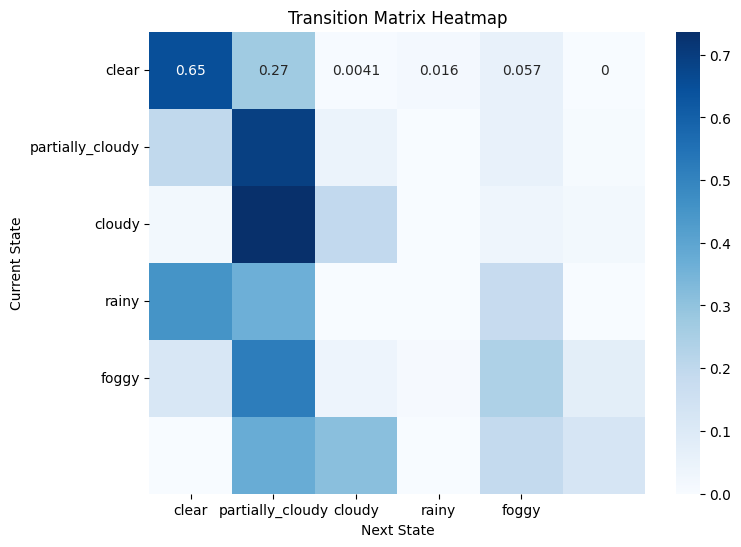

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

states= ['clear', 'partially_cloudy', 'cloudy', 'rainy', 'foggy']


def plot_transition_heatmap(transition_matrix, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(transition_matrix, annot=True, cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title("Transition Matrix Heatmap")
    plt.xlabel("Next State")
    plt.ylabel("Current State")
    plt.show()

plot_transition_heatmap(transition_matrix, states)


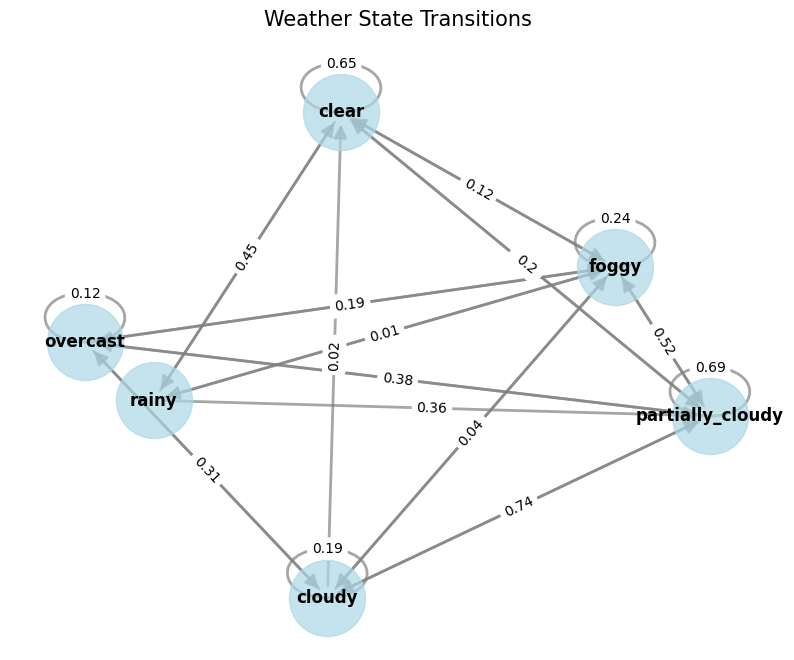

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# Define possible weather states (6 states)
states = ['clear', 'partially_cloudy', 'cloudy', 'rainy', 'foggy', 'overcast']

# Define the transition matrix with example probabilities (6x6 matrix)
# These are placeholders for the transition probabilities between the states
transition_matrix = [
    [C_after_C_prob, PC_after_C_prob, OV_after_C_prob, R_after_C_prob, RPC_after_C_prob, ROV_after_C_prob], 
    [C_after_PC_prob, PC_after_PC_prob, OV_after_PC_prob, R_after_PC_prob, RPC_after_PC_prob, ROV_after_PC_prob],
    [C_after_OV_prob, PC_after_OV_prob, OV_after_OV_prob, R_after_OV_prob, RPC_after_OV_prob, ROV_after_OV_prob],
    [C_after_R_prob, PC_after_R_prob, OV_after_R_prob, R_after_R_prob, RPC_after_R_prob, ROV_after_R_prob],
    [C_after_RPC_prob, PC_after_RPC_prob, OV_after_RPC_prob, R_after_RPC_prob, RPC_after_RPC_prob, ROV_after_RPC_prob],
    [C_after_ROV_prob, PC_after_ROV_prob, OV_after_ROV_prob, R_after_ROV_prob, RPC_after_ROV_prob, ROV_after_ROV_prob]
]
transition_matrix = [[round(val, 2) for val in row] for row in transition_matrix]
# Ensure the matrix has the correct dimensions (6x6)
assert len(transition_matrix) == len(states), "Matrix size does not match the number of states."

# Create a directed graph to represent the transition probabilities
G = nx.DiGraph()

# Add nodes for each state
for state in states:
    G.add_node(state)

# Add edges for each transition with corresponding weights
for i, row in enumerate(transition_matrix):
    for j, val in enumerate(row):
        if val > 0:  # Only add an edge if there is a non-zero probability
            G.add_edge(states[i], states[j], weight=val)

# Visualize the graph using NetworkX
pos = nx.spring_layout(G, seed=42)  # Define layout for the graph
plt.figure(figsize=(10, 8))

# Draw the network graph
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color="lightblue", alpha=0.7)
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
nx.draw_networkx_edges(G, pos, width=2, alpha=0.7, edge_color="gray",arrows=True, arrowstyle='-|>', arrowsize=20)

# Annotate edge labels with transition probabilities
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.title("Weather State Transitions", fontsize=15)
plt.axis('off')  # Hide the axis
plt.show()


Simulated Weather Forecast:
['clear', 'clear', 'clear', 'clear', 'clear', 'partially_cloudy', 'clear', 'partially_cloudy', 'cloudy', 'cloudy', 'partially_cloudy', 'partially_cloudy', 'partially_cloudy', 'cloudy', 'cloudy', 'partially_cloudy', 'cloudy', 'cloudy', 'cloudy', 'partially_cloudy', 'partially_cloudy', 'cloudy', 'partially_cloudy', 'cloudy', 'cloudy', 'cloudy', 'cloudy', 'cloudy', 'overcast', 'cloudy']


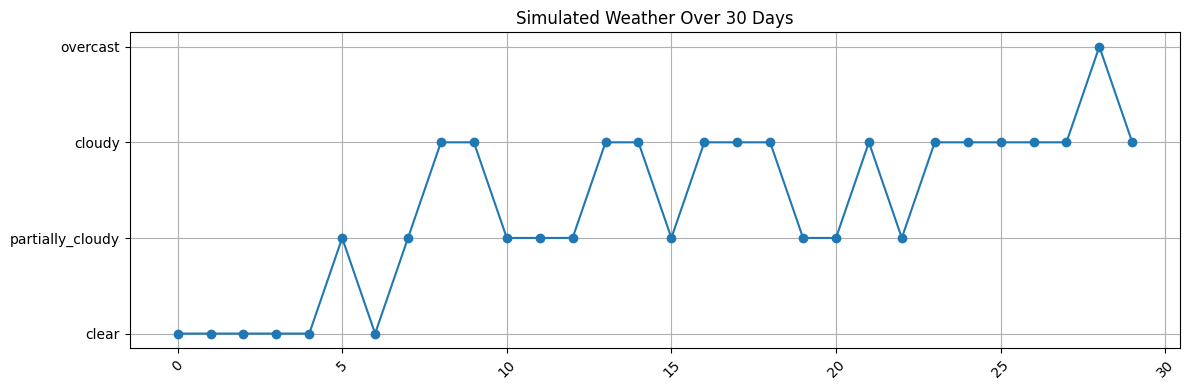

In [ ]:
import random
import matplotlib.pyplot as plt

# List of weather states
states = ['clear', 'partially_cloudy', 'cloudy', 'rainy', 'foggy', 'overcast']

# Function to simulate weather
def simulate_weather(start_state, days, states, transition_matrix):
    current_state = start_state
    weather_forecast = [current_state]

    for _ in range(days - 1):
        current_index = states.index(current_state)
        next_state = random.choices(states, weights=transition_matrix[current_index])[0]
        weather_forecast.append(next_state)
        current_state = next_state

    return weather_forecast

# Simulate 30 days starting from 'clear'
simulated_weather = simulate_weather('clear', 30, states, transition_matrix)

# Print simulation results
print("Simulated Weather Forecast:")
print(simulated_weather)

# Optional: Plot the simulation
plt.figure(figsize=(12, 4))
plt.plot(simulated_weather, marker='o')
plt.title("Simulated Weather Over 30 Days")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
